In [1]:
# Managing Used Car Auction Data for ML Models
import ipywidgets as widgets
import numpy as np
from IPython.display import display
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import qgrid
import os
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model

In [2]:
# Choose a file you want to use
fc = FileChooser()
display(fc)

FileChooser(path='/Users/jonathan/Desktop/Masters/DSCI551/Project/Code/Project', filename='', title='', show_h…

In [3]:
# Load raw data into database
%run load.py
loadData(fc.selected, "raw_data")

In [4]:
# Data explorer: please choose a table to explore
# database will be populated with tables as you go on so be sure to run this cell again to update tables
%run getTables.py
%run query.py
tables = widgets.Dropdown(options = getTables(), value = "raw_data", description = "Table:")
display(tables)

Dropdown(description='Table:', options=('raw_data',), value='raw_data')

<IPython.core.display.Javascript object>


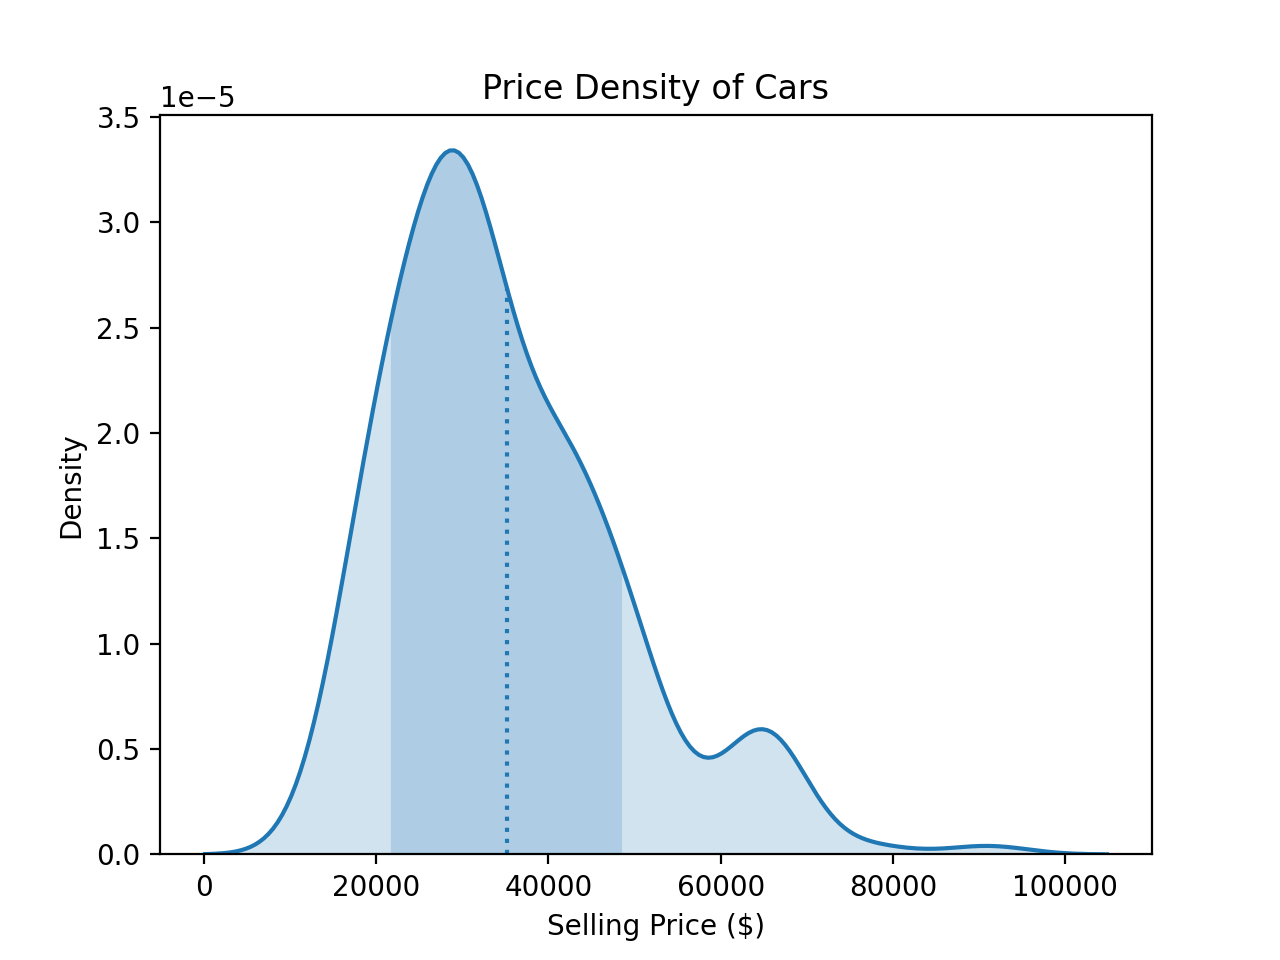

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Metadata of currently viewed table:
There are 1000 rows and 17 columns using 132.94 KB of memory in total.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [5]:
# Explore data and metadata (run the above cell first and choose a table before running this cell)
for i in range(50):
    clear_output(wait=True)

%run extractmeta.py
%run query.py
%run plot.py
%matplotlib notebook
qgrid_data = queryData(tables.value)
qgrid_widget = qgrid.show_grid(qgrid_data, show_toolbar=True)

data = qgrid_data["sellingprice"]
plotData(data)

def handle_filter_changed(event, widget):
    qgrid_df = qgrid_widget.get_changed_df()
    data = qgrid_df["sellingprice"]
    plt.clf()
    plotData(data)

qgrid_widget.on('filter_changed', handle_filter_changed)

display(qgrid_widget)

meta_df = extractMeta(qgrid_data)
meta_df_widget = qgrid.show_grid(meta_df, show_toolbar=True)
display(meta_df_widget)

In [6]:
# Extract features and clean
%run transform.py
missing_data = widgets.Dropdown(options = ["Remove missing data", "Replace missing data"], value = "Remove missing data", description = "Missing Data Treatment:")
display(missing_data)
outlier = widgets.Dropdown(options = ["Yes", "No"], value = "Yes", description = "Remove Outliers?:")
display(outlier)

Dropdown(description='Missing Data Treatment:', options=('Remove missing data', 'Replace missing data'), value…

Dropdown(description='Remove Outliers?:', options=('Yes', 'No'), value='Yes')

In [7]:
# Upload features onto database
raw_data = queryData("raw_data")
features = transformData(raw_data, missing_data.value, outlier.value)
loadData(features, "features")

In [8]:
# Select method
method = widgets.Dropdown(options = ["Recommend similar cars", "Predict price of car"], value = "Recommend similar cars", description = "Method:")
display(method)

Dropdown(description='Method:', options=('Recommend similar cars', 'Predict price of car'), value='Recommend s…

In [17]:
# Run method
%run knn.py
%run regression.py
if method.value == "Recommend similar cars":
    recommendations = recommend(features)
    loadData(recommendations, "recommendations")
elif method.value == "Predict price of car":
    predict = predict(features)

Year: 2010
Condition: 5
Odometer: 0
Make: kia
Model: sorento


In [19]:
# CLEAR DATABASE
%run clearDatabase.py
clearDatabase()